In [2]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks


# Extract the data
run_number = "1101"
hit_data = rf.get_ROOT_data_zip(f"TB_FIRE_{run_number}_hits.root")


imports work
TB_FIRE_1101_hits.root finished


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

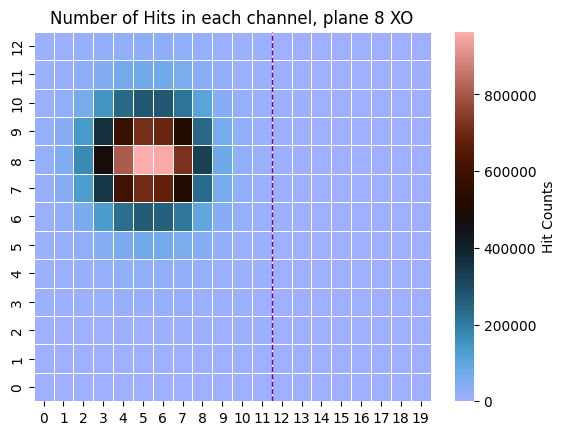

In [3]:
rf.hits_amount_colormap_single_plane(hit_data, 8)

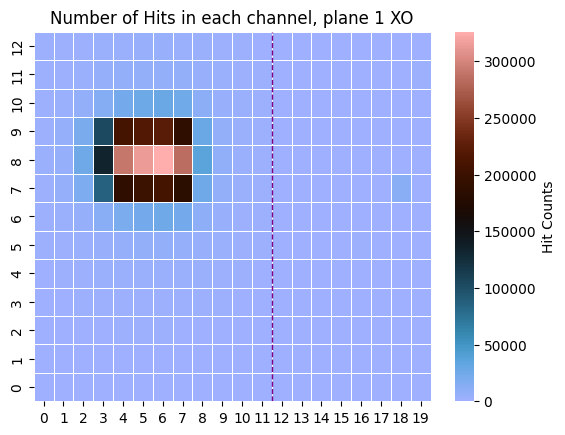

In [4]:
rf.hits_amount_colormap_single_plane(hit_data, 1)

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

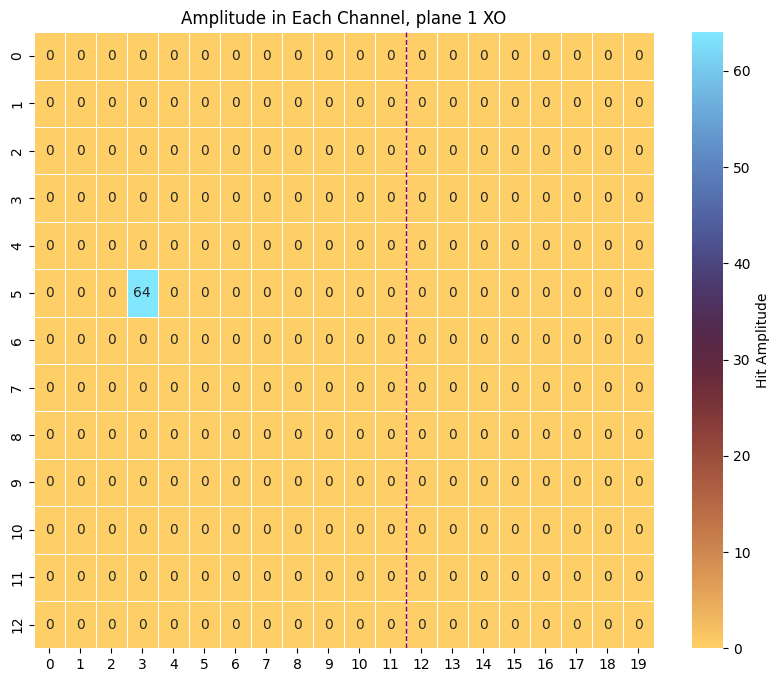

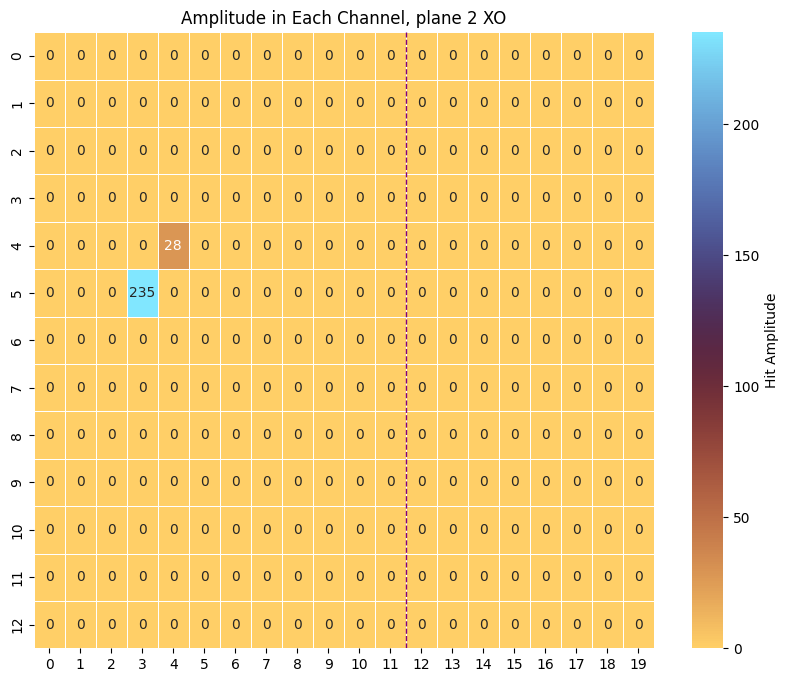

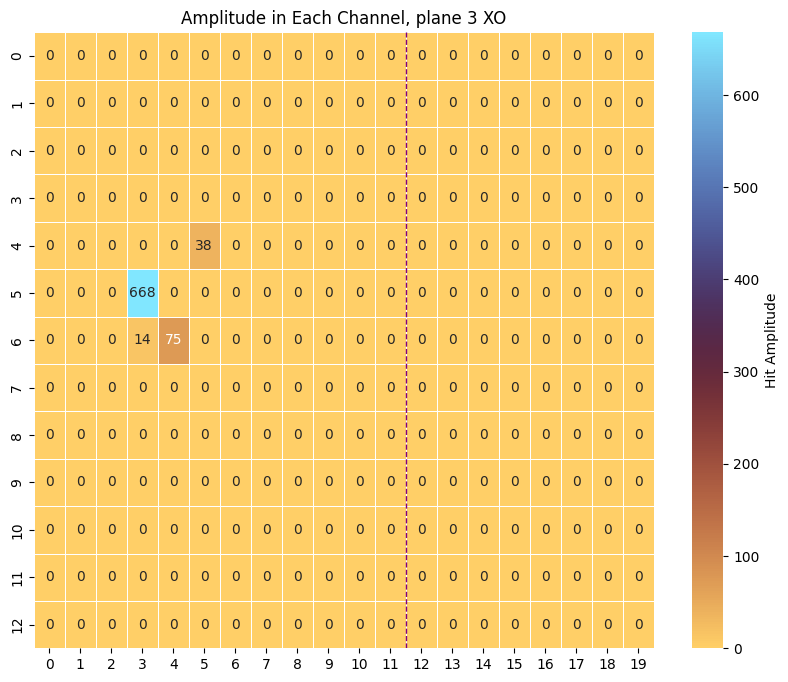

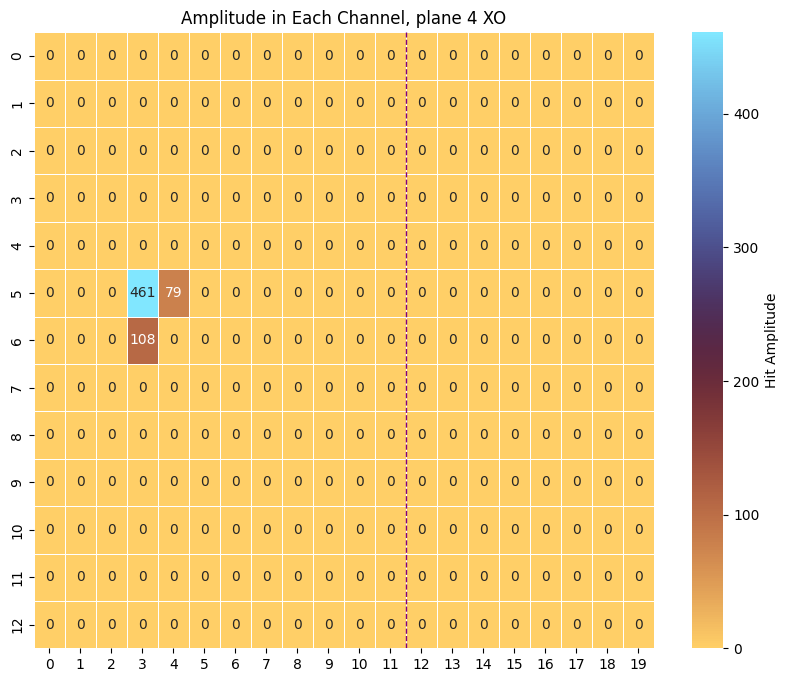

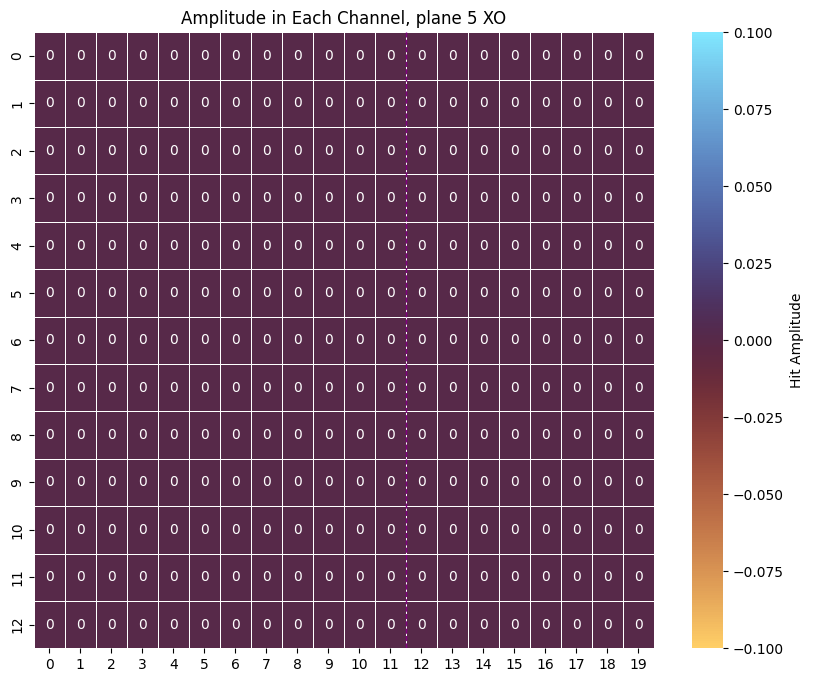

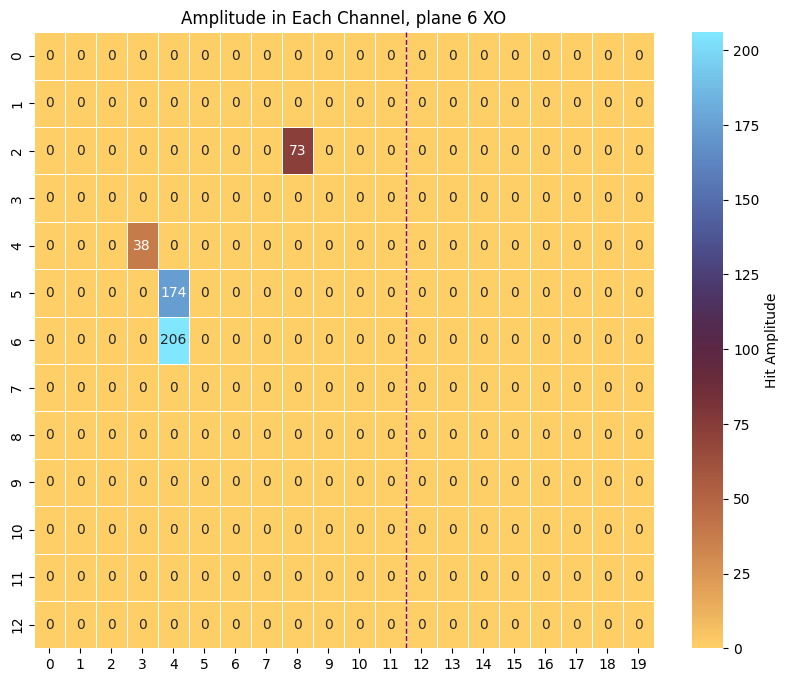

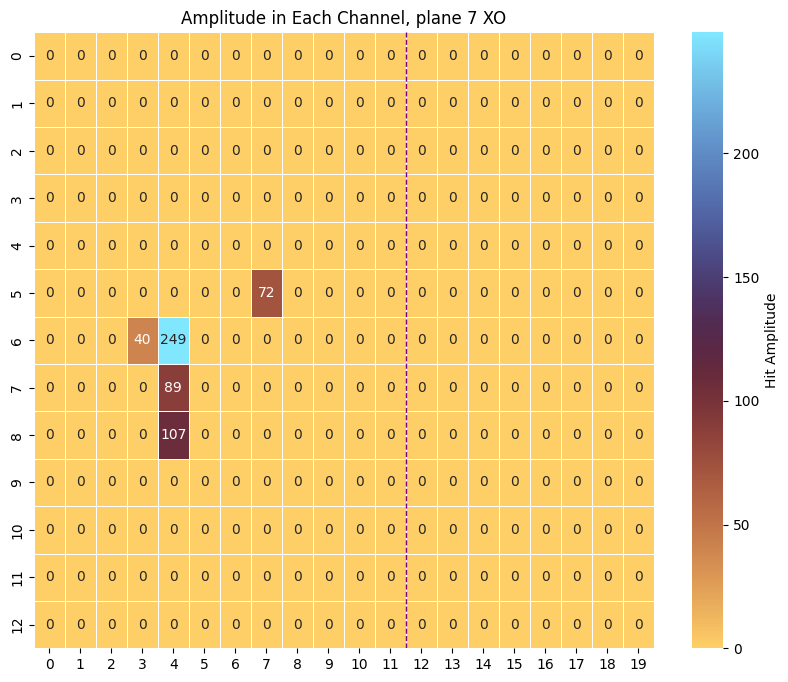

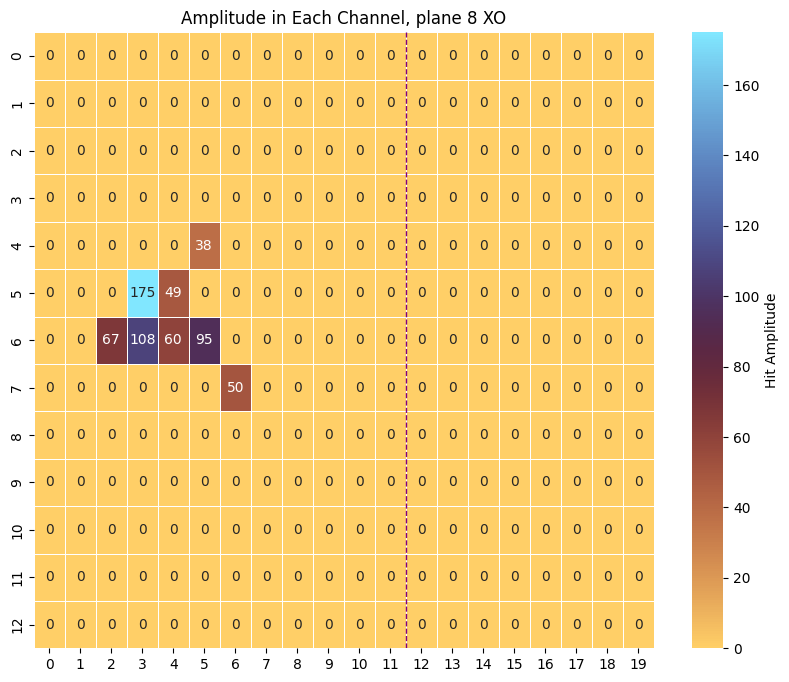

In [5]:
rf.single_event_evolution_amp(hit_data, 1504132, cmap="managua")


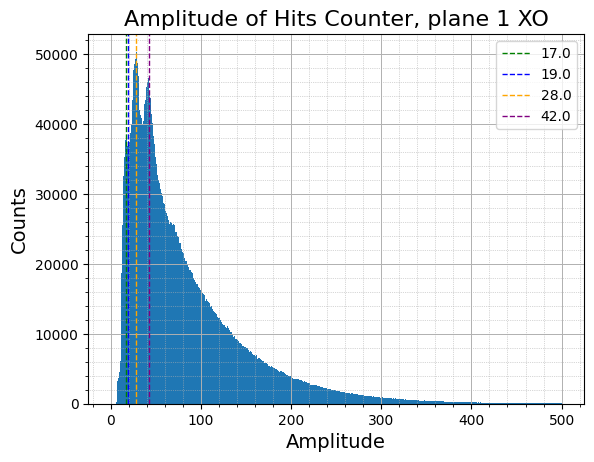

In [6]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
rf.amp_histo_single_plane(hit_data,1)

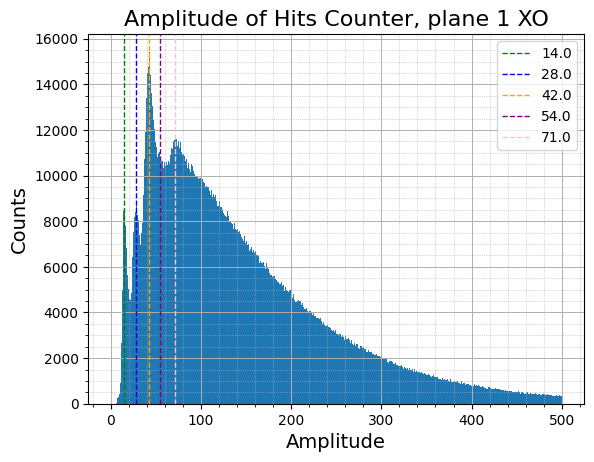

In [7]:
rf.amp_histo_single_plane_total_event(hit_data,1)

amount of hits in plane 0: 2154539
amount of hits in plane 1: 2267642
amount of hits in plane 2: 2299936
amount of hits in plane 3: 2305207
amount of hits in plane 4: 287522
amount of hits in plane 5: 2339654
amount of hits in plane 6: 2333522
amount of hits in plane 7: 2347161


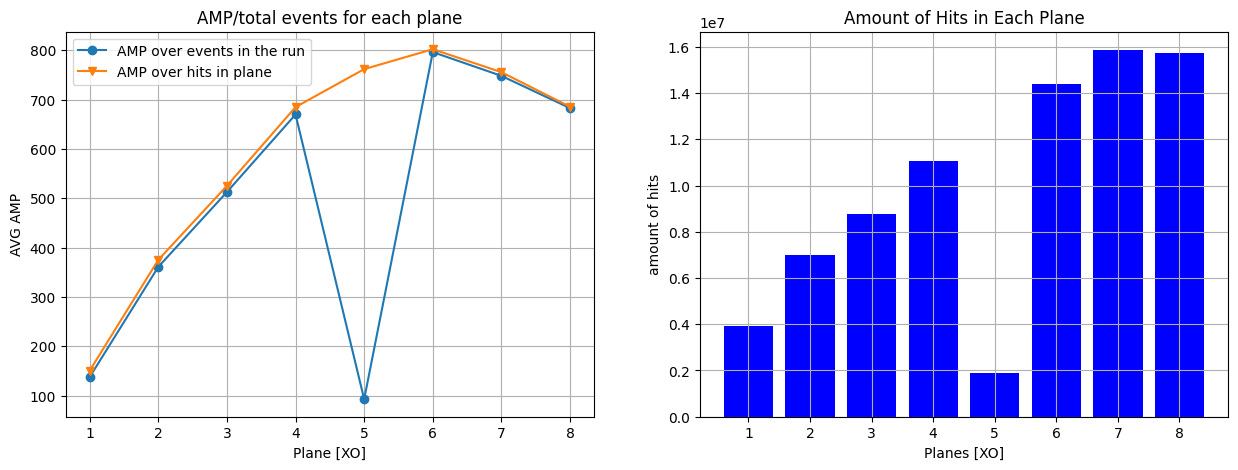

In [8]:
rf.average_amp_vs_plane(hit_data)

In [9]:
# rf.plot_empty_first_planes(hit_data)

1086090
1086090
1086090
1086090


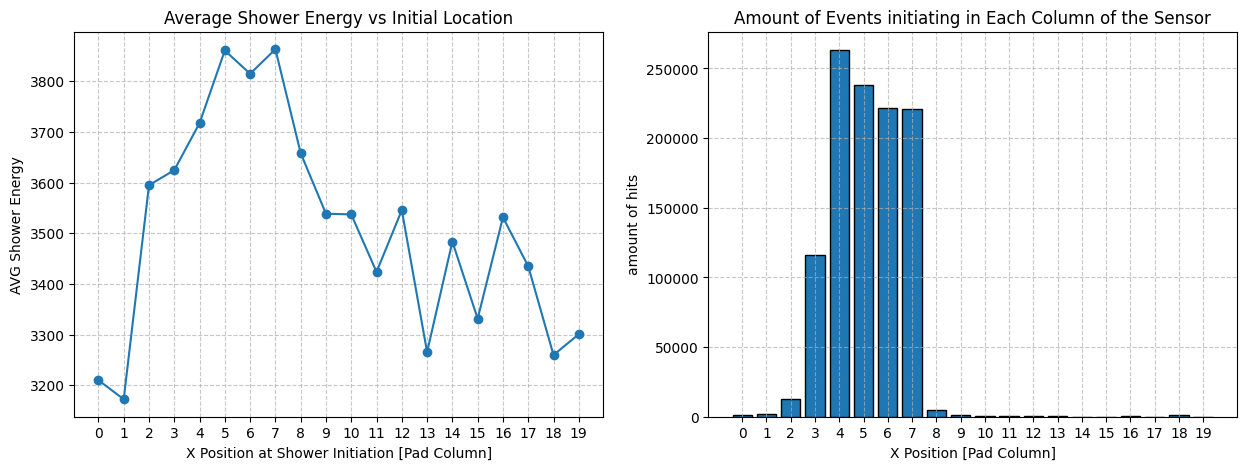

In [10]:
rf.event_shower_energy_vs_X_position(hit_data, single_pad_only = "true")

[2 3 4 5 6 7]
2
3
4
5
6
7


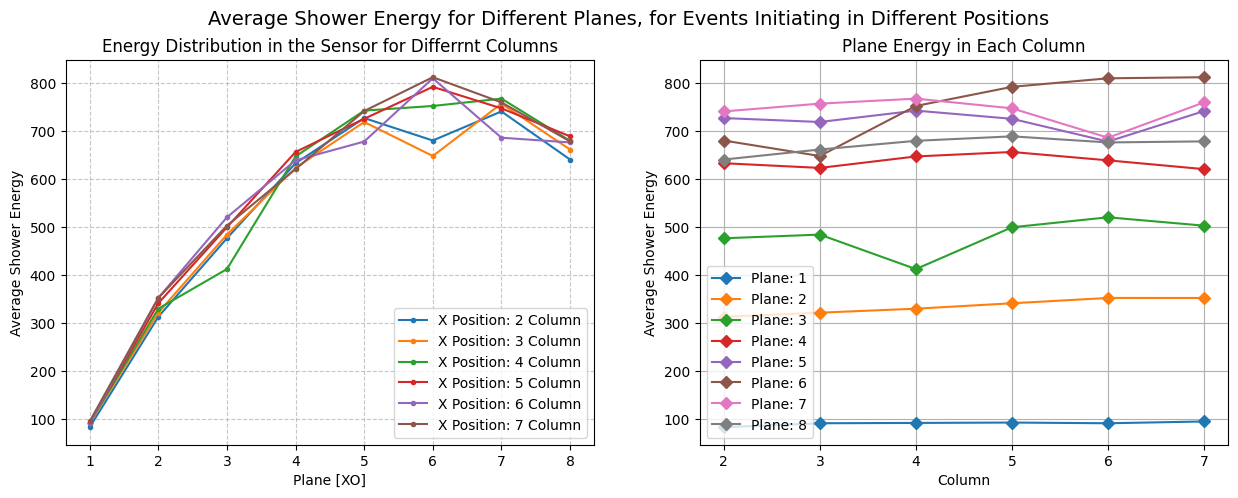

In [11]:
rf.avg_ENERGY_vs_plane_per_X_position(hit_data,6)

2 13042
########
3 116440
########
4 263237
########
5 238416
########
6 221755
########
7 220714
########


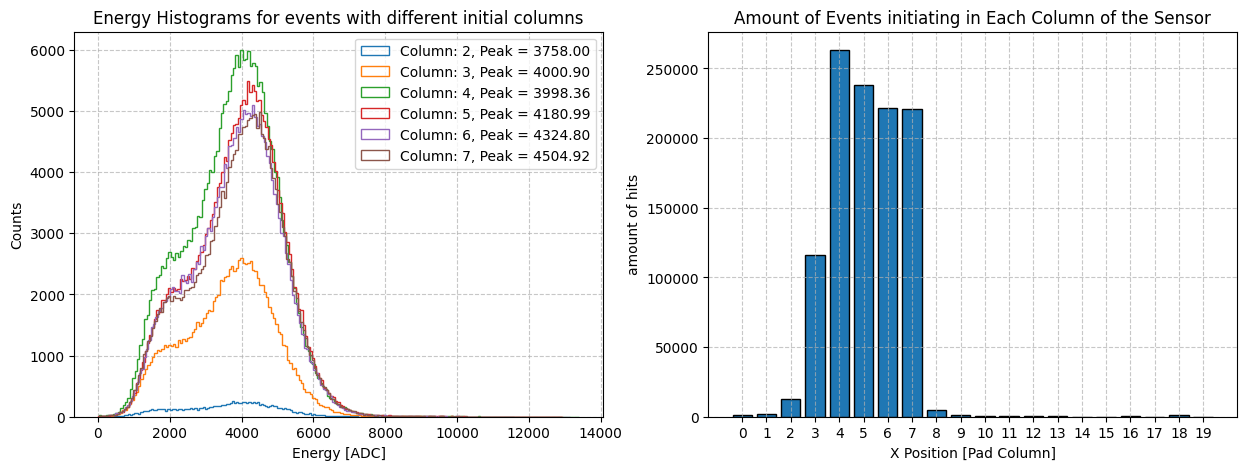

In [12]:
rf.Histo_shower_energy_for_X_position(hit_data, 6, single_pad_only = "true")